# Yelp Data Challenge - NLP

### Flora Li

### Goal

1. Define feature variables(text) and target variables(stars).
2. Split training and testing dataset.
3. Use TfidfVectorizer in sklearn to do text NLP (vectorizer, include Tokenize and Lower case, Remove Stop Words,Stemming and Lemmatization), train the model with the train dataset(vectors_train), and get vocabulary for our corpus(words).

***Application***:
1. Build similar review search engine by calculating cosine similarity: find top 5 similar reviews compared with our search query.
2. Classifying positive/negative review: Naive Bayes, Logistic Regression, Random Forest, and Xgboost.
3. Use cross validation to evaluate your classifiers, and use grid search to find best predictable classifier


***Important notice***: For Naive Bayes, Logistic Regression, Random Forest, the training dataset to fit the model should be array(vectors_train), but for Xgboost, it should be a sparse matrix.



In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('last_2_years_restaurant_reviews1.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 338573 entries, 0 to 338572
Data columns (total 12 columns):
business_id    338573 non-null object
name           338573 non-null object
categories     338573 non-null object
avg_stars      338573 non-null float64
cool           338573 non-null int64
date           338573 non-null object
funny          338573 non-null int64
review_id      338573 non-null object
stars          338573 non-null int64
text           338573 non-null object
useful         338573 non-null int64
user_id        338573 non-null object
dtypes: float64(1), int64(4), object(7)
memory usage: 31.0+ MB


In [4]:
df.head()

,business_id,name,categories,avg_stars,cool,date,funny,review_id,stars,text,useful,user_id
0,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"[Steakhouses, Cajun/Creole, Restaurants]",4.0,1,2016-05-17,0,0Qc1THNHSapDL7cv-ZzW5g,5,What can I say.. Wowzers! Probably one of the ...,0,4LxKRRIikhr65GfPDW626w
1,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"[Steakhouses, Cajun/Creole, Restaurants]",4.0,0,2017-01-20,0,L8lo5SKXfZRlbn1bpPiC9w,5,Went here for guys weekend. Unbelievable. Ravi...,0,nT8zgjoc-PbdBoQsFEXFLw
2,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"[Steakhouses, Cajun/Creole, Restaurants]",4.0,52,2016-09-25,30,6eUT3IwwWPP3CZkAhxqOIw,5,"One word my friends: tableside!!! Yes, tablesi...",56,7RlyCglsIzhBn081inwvcg
3,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"[Steakhouses, Cajun/Creole, Restaurants]",4.0,1,2017-02-12,0,3cnTdE45VrsS0o4cVhfGog,3,"Located inside my favorite hotel Venetian, Del...",1,rOIrilMC7VFwFVBeQNiKMw
4,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"[Steakhouses, Cajun/Creole, Restaurants]",4.0,0,2016-10-30,0,tYrSbjX3QgZGBZuQ3n8g6w,5,"After the most incredible service, delicious m...",2,PiWlV_UC_-SXqyxQM9fAtw


### Define your feature variables, here is the text of the review

In [5]:
# Take the values of the column that contains review text data, save to a variable named "documents"
documents = df["text"].values
# here .values makes result numpy array
# I forgot to use .values at first

In [6]:
# inspect your documents, e.g. check the size, take a peek at elements of the numpy array
documents.dtype

dtype('O')

In [7]:
documents.shape

(338573L,)

In [8]:
documents[2]

"One word my friends: tableside!!! Yes, tableside carving of your steak chateaubriand for two/Creekstone farm steaks never disappoints. One of the best dinners I had this year for sure.  I would recommend Delmonico restaurant in Vegas who ever goes to Vegas or lives there.  \r\n\r\nDelmonico is settled within the Venetian hotel and with a 5 pm dinner reservation , they were pretty busy by 6 pm. I'm assuming people want to eat good streak before different shows and other entertainment in Vegas. Service was impeccable with the server and assistant both working harmoniously together.  The restaurant is not overly pretentious or glamorous looking.  I liked the overall atmosphere with the white walls/crisp white tablecloths on the tables with dim lighting.  \r\n\r\nThe service starts with the complimentary brioche bread and butter which were decadently heavenly.  Then they entice and educate you about their wine list etc but I don't drink so I was ready to order some steak, steak, steak! I 

### Define your target variable (any categorical variable that may be meaningful)

#### For example, I am interested in perfect (5 stars) and imperfect (1-4 stars) rating

In [9]:
# Make a column and take the values, save to a variable named "target"
df['favorable'] = df['stars'] > 4

In [10]:
target = df['favorable'].values

In [11]:
target[:5]

array([ True,  True,  True, False,  True], dtype=bool)

#### You may want to look at the statistic of the target variable

In [12]:
target.dtype

dtype('bool')

In [13]:
target.shape, documents.shape

((338573L,), (338573L,))

In [14]:
target.mean(), target.std()

(0.46748264037593074, 0.49894150090274003)

## Let's create training dataset and test dataset¶

In [15]:
from sklearn.cross_validation import train_test_split

C:\Users\Flora\Anaconda\envs\python27\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [19]:
# Documents is your X, target is your y
# Now split the data to training set and test set

In [16]:
# Split to documents_train, documents_test, target_train, target_test
documents_train, documents_test, target_train, target_test = train_test_split(
    documents,
    target,
    test_size = 0.6,
    random_state = 12   # random_state is the random number generator
)

## Let's get NLP representation of the documents

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [18]:
# Create TfidfVectorizer, and name it vectorizer
vectorizer = TfidfVectorizer(stop_words = 'english',max_features = 5000)

In [19]:
# Train the model with your training data
vectors_train = vectorizer.fit_transform(documents_train).toarray()
# is not .toarray(), vectors_train will be a sparse matrix

In [20]:
# Get the vocabulary of your tfidf 
words = vectorizer.get_feature_names()

In [21]:
words[:20]

[u'00',
 u'00pm',
 u'10',
 u'100',
 u'10am',
 u'10pm',
 u'11',
 u'110',
 u'11am',
 u'11pm',
 u'12',
 u'120',
 u'13',
 u'14',
 u'15',
 u'150',
 u'16',
 u'17',
 u'18',
 u'19']

In [22]:
vectors_train.shape

(135429L, 5000L)

In [23]:
# Use the trained model to transform your test data
vectors_test = vectorizer.transform(documents_test).toarray()

## Similar review search engine

In [24]:
import numpy as np

# We will need these helper methods pretty soon

def get_top_values(lst, n, labels):
    '''
    INPUT: LIST, INTEGER, LIST
    OUTPUT: LIST

    Given a list of values, find the indices with the highest n values.
    Return the labels for each of these indices.

    e.g.
    lst = [7, 3, 2, 4, 1]
    n = 2
    labels = ["cat", "dog", "mouse", "pig", "rabbit"]
    output: ["cat", "pig"]
    '''
    return [labels[i] for i in np.argsort(lst)[::-1][:n]]  # np.argsort by default sorts values in ascending order

def get_bottom_values(lst, n, labels):
    '''
    INPUT: LIST, INTEGER, LIST
    OUTPUT: LIST

    Given a list of values, find the indices with the lowest n values.
    Return the labels for each of these indices.

    e.g.
    lst = [7, 3, 2, 4, 1]
    n = 2
    labels = ["cat", "dog", "mouse", "pig", "rabbit"]
    output: ["mouse", "rabbit"]
    '''
    return [labels[i] for i in np.argsort(lst)[:n]]
    # argsort returns index


In [25]:
# Let's use cosine similarity
from sklearn.metrics.pairwise import cosine_similarity

In [26]:
# Draw an arbitrary review from test (unseen in training) documents
some_random_number = 54
search_query = documents_test[some_random_number]
search_queries = [search_query] #transform into a list
print search_query
print search_queries

Leaving vegas today and wanted to leave on a high note so why not come back here right . The service at this place is marvelous top notch. Now today the cooks were off their game I ordered the 2 egg breakfast no meat. I don't like heavy food when I travel. I ordered two poached eggs and one pancake and fruit. The pancake was ok nothing special the fruit actually tasted good now my poached eggs are another subject not only were they overcooked but when I got them they were sitting in water in an ramekin now imagine if you weren't paying attention and dumped that on your plate of fluffy pancake yup messed up pancake lucky for me I pay attention to my food . I don't know if I'm going to come back to B.B.D. but I think I will stick to lunch idk.
["Leaving vegas today and wanted to leave on a high note so why not come back here right . The service at this place is marvelous top notch. Now today the cooks were off their game I ordered the 2 egg breakfast no meat. I don't like heavy food when

In [27]:
# Transform the drawn review(s) to vector(s)
vector_search_queries = vectorizer.transform(search_queries).toarray()

In [28]:
# Calculate the similarity score(s) between vector(s) and training vectors
similarity_scores = cosine_similarity(vector_search_queries, vectors_train)
# computationally expensive

In [29]:
similarity_scores.shape #not a vector

(1L, 135429L)

In [30]:
similarity_scores[0]

array([ 0.01389041,  0.        ,  0.05897697, ...,  0.01422627,
        0.00364969,  0.        ])

In [31]:
# Let's find top 5 similar reviews
n=5

returned_reviews = get_top_values(similarity_scores[0], n, documents_train)

In [32]:
print 'Our search query:'
print search_queries[0]

Our search query:
Leaving vegas today and wanted to leave on a high note so why not come back here right . The service at this place is marvelous top notch. Now today the cooks were off their game I ordered the 2 egg breakfast no meat. I don't like heavy food when I travel. I ordered two poached eggs and one pancake and fruit. The pancake was ok nothing special the fruit actually tasted good now my poached eggs are another subject not only were they overcooked but when I got them they were sitting in water in an ramekin now imagine if you weren't paying attention and dumped that on your plate of fluffy pancake yup messed up pancake lucky for me I pay attention to my food . I don't know if I'm going to come back to B.B.D. but I think I will stick to lunch idk.


In [38]:
print 'query'
print search_query

print '\n\nMost %s similar reviews:' % n
for i, review in enumerate(returned_reviews):
    print '#%s:' % i 
    print '%s\n' % review

query
Leaving vegas today and wanted to leave on a high note so why not come back here right . The service at this place is marvelous top notch. Now today the cooks were off their game I ordered the 2 egg breakfast no meat. I don't like heavy food when I travel. I ordered two poached eggs and one pancake and fruit. The pancake was ok nothing special the fruit actually tasted good now my poached eggs are another subject not only were they overcooked but when I got them they were sitting in water in an ramekin now imagine if you weren't paying attention and dumped that on your plate of fluffy pancake yup messed up pancake lucky for me I pay attention to my food . I don't know if I'm going to come back to B.B.D. but I think I will stick to lunch idk.


Most 5 similar reviews:
#0:
Must try this place.  Their breakfast is as good as any 5 stars hotel on the strip in Vegas.  Price is very reasonable. Service is good.  Very friendly staff.  I had Deep-fried deviled eggs and pancake.  They put

#### Q: Does the result make sense to you?

The search_query first talks good about the restaurant's service - "marvelous top notch", and then describes the specific experience that day is not so good. The #2 and #4 are more make sense because they talk about both positive and negative parts. While other similar reviews only talk about positive.

## Classifying positive/negative review

### Naive-Bayes Classifier

In [33]:
# Build a Naive-Bayes Classifier

from sklearn.naive_bayes import MultinomialNB

model_nb = MultinomialNB()

model_nb.fit(vectors_train, target_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [34]:
# training data accuracy
model_nb.score(vectors_train, target_train)  #accuracy

0.81162084930110978

In [35]:
# testing data accuracy
model_nb.score(vectors_test, target_test)

0.80607352419958256

### Logistic Regression Classifier

In [37]:
# Build a Logistic Regression Classifier
from time import time
t0=time()

from sklearn.linear_model import LogisticRegression

model_lrc = LogisticRegression()
model_lrc.fit(vectors_train, target_train)

t1=time()

print "fitting model costs {0:.4f}s: ".format(t1-t0)

fitting model costs 4.7920s: 


In [38]:
# training data accuracy
model_lrc.score(vectors_train, target_train)

0.84392559939156309

In [39]:
# testing data accuracy
model_lrc.score(vectors_test, target_test)

0.82996790454062142

We can see that the accuracy on test data using logistic regression increase 2.3% compared with Naive Bayes.

#### Q: What are the key features(words) that make the positive prediction?

In [40]:
model_lrc.coef_[0]

array([-1.09556931, -0.51404221,  1.0485633 , ..., -2.92791511,
        0.11577657, -0.69441202])

In [41]:
n=20
get_top_values(model_lrc.coef_[0],n, words)
# regression.coef_ is used to get the corresponding coefficients to the 
# features, here regression.coef_[0] corresponds to "feature1" 

[u'amazing',
 u'best',
 u'awesome',
 u'incredible',
 u'thank',
 u'delicious',
 u'perfect',
 u'excellent',
 u'phenomenal',
 u'fantastic',
 u'favorite',
 u'great',
 u'notch',
 u'heaven',
 u'perfection',
 u'outstanding',
 u'love',
 u'wonderful',
 u'gem',
 u'highly']

These words make sense for positive reviews.

#### Q: What are the key features(words) that make the negative prediction?

In [42]:
n=20
get_bottom_values(model_lrc.coef_[0],n, words)

[u'worst',
 u'rude',
 u'ok',
 u'horrible',
 u'disappointing',
 u'terrible',
 u'mediocre',
 u'bland',
 u'slow',
 u'okay',
 u'overpriced',
 u'average',
 u'awful',
 u'lacking',
 u'unfortunately',
 u'meh',
 u'poor',
 u'decent',
 u'alright',
 u'dry']

These words make sense for negative reviews.

### Random Forest Classifier

In [43]:
# Build a Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier
model_rfc = RandomForestClassifier(max_depth=None,
                                  n_estimators = 5,
                                  min_samples_leaf = 10)
model_rfc.fit(vectors_train, target_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=10, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [44]:
# training data accuracy
model_rfc.score(vectors_train, target_train)

0.8194109090372077

In [45]:
# testing data accuracy
model_rfc.score(vectors_test, target_test)

0.77558283778994208

Testing data accuracy is much lower than the training data accuracy, so the random forest classifier can be overftting.

#### Q: Can you tell what features (words) are important by inspecting the RFC model?

In [46]:
n=20
get_top_values(model_rfc.feature_importances_,n, words)

[u'great',
 u'amazing',
 u'best',
 u'delicious',
 u'ok',
 u'love',
 u'vegas',
 u'like',
 u'asked',
 u'awesome',
 u'didn',
 u'worst',
 u'perfect',
 u'decent',
 u'definitely',
 u'highly',
 u'pretty',
 u'friendly',
 u'minutes',
 u'slow']

### Xgboost Classifier

In [62]:
from time import time
t0=time()

from xgboost import XGBClassifier

model_xgb = XGBClassifier(n_estimators=200)

model_xgb.fit(vectorizer.fit_transform(documents_train), target_train)

# to fit into a xgboost model, the train dataset has to be a matrix instead of an array.

t1=time()

print "fitting model costs {0:.4f}s: ".format(t1-t0)

fitting model costs 92.9010s: 


In [68]:
# training data accuracy
vectors_train_matrix = vectorizer.fit_transform(documents_train)
model_xgb.score(vectors_train_matrix, target_train)

0.80461348751006068

In [67]:
# testing data accuracy
vectors_test_matrix = vectorizer.transform(documents_test)
model_xgb.score(vectors_test_matrix, target_test)

0.79666148151065252

We can further use grid search to find the best parameters for Xgboost to imporve the performance.

In [71]:
# get the top 10 important features
n=20
get_top_values(model_xgb.feature_importances_,n, words)

[u'delicious',
 u'great',
 u'amazing',
 u'perfect',
 u'stars',
 u'definitely',
 u'good',
 u'best',
 u'reason',
 u'favorite',
 u'vegas',
 u'awesome',
 u'bit',
 u'love',
 u'excellent',
 u'ok',
 u'pretty',
 u'loved',
 u'place',
 u'little']

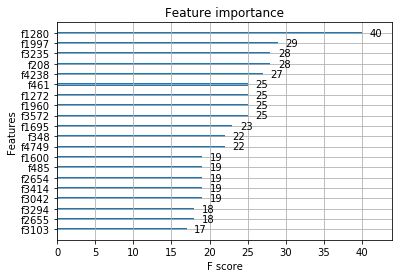

In [93]:
# plot
from xgboost import plot_importance
from matplotlib import pyplot

plot_importance(model_xgb, max_num_features=20)
pyplot.show()

### Extra Credit #1: Use cross validation to evaluate your classifiers

In [37]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(model_lrc,
                            vectors_train,
                            target_train,
                            cv = 5,
                            scoring="accuracy")

In [39]:
print("Accuracy: %0.2f (+/- %0.2f)" % (cv_scores.mean(), cv_scores.std() * 2))

Accuracy: 0.83 (+/- 0.00)


Therefore, the mean accuracy for cross validation is 0.83 with 0 standard deviation.

### Extra Credit #2: Use grid search to find best predictable classifier

In [40]:
# Tune Logistic Regression Regularization parameter C and different penalty

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

param_grid = [{'penalty':['l1'], 'C':[0.1, 100]},
              {'penalty':['l2'], 'C':[0.1, 100]}]

scores = ['accuracy']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score + "\n\n")
    clf = GridSearchCV(LogisticRegression(),
                       param_grid,
                       cv=5,
                       scoring=score)
    clf.fit(vectors_train[:500,:], target_train[:500])
    print("Best parameters set found on development set:\n\n")
    print(clf.best_params_)
    print("\nGrid scores on development set:\n\n")
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    
    print("\nDetailed classification report:\n")
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print("\n")
    y_true, y_pred = target_test, clf.predict(vectors_test)
    print(classification_report(y_true, y_pred))
    print("\n")

# Tuning hyper-parameters for accuracy


Best parameters set found on development set:


{'penalty': 'l2', 'C': 100}

Grid scores on development set:


0.522 (+/-0.005) for {'penalty': 'l1', 'C': 0.1}
0.730 (+/-0.106) for {'penalty': 'l1', 'C': 100}
0.620 (+/-0.077) for {'penalty': 'l2', 'C': 0.1}
0.746 (+/-0.047) for {'penalty': 'l2', 'C': 100}

Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluation set.


             precision    recall  f1-score   support

      False       0.75      0.80      0.77    108155
       True       0.75      0.70      0.73     94989

avg / total       0.75      0.75      0.75    203144



